Function for finding impureness

In [7]:
def gini_impurity(class_counts):
    """
    Calculate the Gini impurity of a node.

    Parameters:
    class_counts (list): A list of integers where each integer represents the
                         number of samples belonging to a particular class.

    Returns:
    float: Gini impurity of the node.
    """
    total_samples = sum(class_counts)
    if total_samples == 0:
        return 0.0  # No impurity if the node is empty

    probabilities = [count / total_samples for count in class_counts]
    gini = 1 - sum(p ** 2 for p in probabilities)
    return gini

# Example Usage
# Example 1: Class 1: 15, Class 2: 15
class_counts_example1 = [15, 15]
gini1 = gini_impurity(class_counts_example1)
print(f"Example 1 Gini Impurity: {gini1:.3f}")  # Expected: 0.500

# Example 2: Class 1: 15, Class 2: 15, Class 3: 15
class_counts_example2 = [15, 15, 15]
gini2 = gini_impurity(class_counts_example2)
print(f"Example 2 Gini Impurity: {gini2:.3f}")  # Expected: 0.667

# Example 3: Class 1: 18, Class 2: 12
class_counts_example3 = [18, 12]
gini3 = gini_impurity(class_counts_example3)
print(f"Example 3 Gini Impurity: {gini3:.3f}")  # Expected: 0.480

# Example 4: Class 1: 30, Class 2: 0
class_counts_example4 = [30, 0]
gini4 = gini_impurity(class_counts_example4)
print(f"Example 4 Gini Impurity: {gini4:.3f}")  # Expected: 0.000




Example 1 Gini Impurity: 0.500
Example 2 Gini Impurity: 0.667
Example 3 Gini Impurity: 0.480
Example 4 Gini Impurity: 0.000


Function for finding information gain

In [8]:
def gini_impurity(class_counts):
    """
    Calculate the Gini impurity of a node.

    Parameters:
    class_counts (list): A list of integers where each integer represents the
                         number of samples belonging to a particular class.

    Returns:
    float: Gini impurity of the node.
    """
    total_samples = sum(class_counts)
    if total_samples == 0:
        return 0.0  # No impurity if the node is empty

    probabilities = [count / total_samples for count in class_counts]
    gini = 1 - sum(p ** 2 for p in probabilities)
    return gini

def information_gain(parent_counts, left_counts, right_counts):
    """
    Calculate the Information Gain of a split.

    Parameters:
    parent_counts (list): A list of integers representing the class counts of the parent node.
    left_counts (list): A list of integers representing the class counts of the left child node.
    right_counts (list): A list of integers representing the class counts of the right child node.

    Returns:
    float: Information Gain of the split.
    """
    total_samples = sum(parent_counts)
    left_samples = sum(left_counts)
    right_samples = sum(right_counts)

    if total_samples == 0:
        return 0.0  # No gain if parent is empty

    parent_gini = gini_impurity(parent_counts)
    left_gini = gini_impurity(left_counts)
    right_gini = gini_impurity(right_counts)

    weighted_gini = (left_samples / total_samples) * left_gini + (right_samples / total_samples) * right_gini
    return parent_gini - weighted_gini

# Example Usage
# Parent node: Class 1: 30, Class 2: 35
# Left node: Class 1: 10, Class 2: 30
# Right node: Class 1: 20, Class 2: 5
parent_counts_example = [30, 35]
left_counts_example = [10, 30]
right_counts_example = [20, 5]
info_gain = information_gain(parent_counts_example, left_counts_example, right_counts_example)

print(f"Information Gain: {info_gain:.4f}")  # Expected: 0.143


Information Gain: 0.1432


Learning

Best Feature: 0, Best Threshold: 5.92, Information Gain: 0.2356


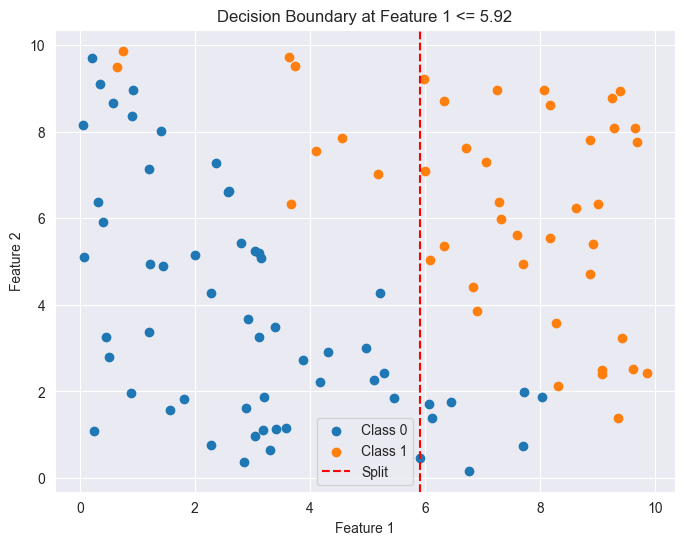

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def gini_impurity(class_counts):
    """
    Calculate the Gini impurity of a node.

    Parameters:
    class_counts (list): A list of integers where each integer represents the
                         number of samples belonging to a particular class.

    Returns:
    float: Gini impurity of the node.
    """
    total_samples = sum(class_counts)
    if total_samples == 0:
        return 0.0  # No impurity if the node is empty

    probabilities = [count / total_samples for count in class_counts]
    gini = 1 - sum(p ** 2 for p in probabilities)
    return gini

def information_gain(parent_counts, left_counts, right_counts):
    """
    Calculate the Information Gain of a split.

    Parameters:
    parent_counts (list): A list of integers representing the class counts of the parent node.
    left_counts (list): A list of integers representing the class counts of the left child node.
    right_counts (list): A list of integers representing the class counts of the right child node.

    Returns:
    float: Information Gain of the split.
    """
    total_samples = sum(parent_counts)
    left_samples = sum(left_counts)
    right_samples = sum(right_counts)

    if total_samples == 0:
        return 0.0  # No gain if parent is empty

    parent_gini = gini_impurity(parent_counts)
    left_gini = gini_impurity(left_counts)
    right_gini = gini_impurity(right_counts)

    weighted_gini = (left_samples / total_samples) * left_gini + (right_samples / total_samples) * right_gini
    return parent_gini - weighted_gini

def split_data(X, y, feature_index, threshold):
    """
    Split the dataset based on a feature and threshold.

    Parameters:
    X (ndarray): Feature matrix.
    y (ndarray): Labels.
    feature_index (int): Index of the feature to split on.
    threshold (float): Threshold value for the split.

    Returns:
    tuple: Left and right splits (X_left, y_left, X_right, y_right).
    """
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

def find_best_split(X, y):
    """
    Find the best split for the dataset based on information gain.

    Parameters:
    X (ndarray): Feature matrix.
    y (ndarray): Labels.

    Returns:
    tuple: Best feature index, best threshold, and best information gain.
    """
    num_features = X.shape[1]
    best_feature = None
    best_threshold = None
    best_gain = -1

    parent_counts = [np.sum(y == c) for c in np.unique(y)]

    for feature_index in range(num_features):
        thresholds = np.unique(X[:, feature_index])

        for threshold in thresholds:
            _, y_left, _, y_right = split_data(X, y, feature_index, threshold)
            left_counts = [np.sum(y_left == c) for c in np.unique(y)]
            right_counts = [np.sum(y_right == c) for c in np.unique(y)]

            gain = information_gain(parent_counts, left_counts, right_counts)
            if gain > best_gain:
                best_gain = gain
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold, best_gain

def visualize_split(X, y, feature_index, threshold):
    """
    Visualize the split on a 2D dataset.

    Parameters:
    X (ndarray): Feature matrix (2D).
    y (ndarray): Labels.
    feature_index (int): Index of the feature to split on.
    threshold (float): Threshold value for the split.
    """
    plt.figure(figsize=(8, 6))
    for class_value in np.unique(y):
        plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f"Class {class_value}")

    if feature_index == 0:
        plt.axvline(x=threshold, color="red", linestyle="--", label="Split")
    elif feature_index == 1:
        plt.axhline(y=threshold, color="red", linestyle="--", label="Split")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.title(f"Decision Boundary at Feature {feature_index + 1} <= {threshold:.2f}")
    plt.show()

# Example Usage
np.random.seed(42)
X_example = np.random.rand(100, 2) * 10
y_example = np.array([0 if x[0] + x[1] < 10 else 1 for x in X_example])

best_feature, best_threshold, best_gain = find_best_split(X_example, y_example)
print(f"Best Feature: {best_feature}, Best Threshold: {best_threshold:.2f}, Information Gain: {best_gain:.4f}")

visualize_split(X_example, y_example, best_feature, best_threshold)


Estimate

Best Feature: 0, Best Threshold: 5.92


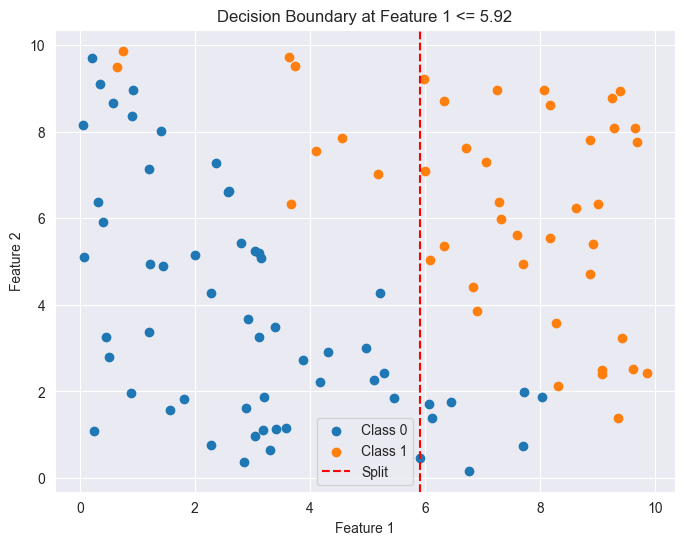

Predictions: [0 1 0 0 1 0 1 0 0 0]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchDecisionTreeClassifierDepth1:
    def __init__(self):
        self.best_feature = None
        self.best_threshold = None
        self.left_class = None
        self.right_class = None

    def gini_impurity(self, class_counts):
        total_samples = sum(class_counts)
        if total_samples == 0:
            return 0.0

        probabilities = [count / total_samples for count in class_counts]
        gini = 1 - sum(p ** 2 for p in probabilities)
        return gini

    def information_gain(self, parent_counts, left_counts, right_counts):
        total_samples = sum(parent_counts)
        left_samples = sum(left_counts)
        right_samples = sum(right_counts)

        if total_samples == 0:
            return 0.0

        parent_gini = self.gini_impurity(parent_counts)
        left_gini = self.gini_impurity(left_counts)
        right_gini = self.gini_impurity(right_counts)

        weighted_gini = (left_samples / total_samples) * left_gini + (right_samples / total_samples) * right_gini
        return parent_gini - weighted_gini

    def split_data(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def find_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_gain = -1

        parent_counts = [np.sum(y == c) for c in np.unique(y)]

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                _, y_left, _, y_right = self.split_data(X, y, feature_index, threshold)
                left_counts = [np.sum(y_left == c) for c in np.unique(y)]
                right_counts = [np.sum(y_right == c) for c in np.unique(y)]

                gain = self.information_gain(parent_counts, left_counts, right_counts)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def fit(self, X, y):
        self.best_feature, self.best_threshold, _ = self.find_best_split(X, y)

        X_left, y_left, X_right, y_right = self.split_data(X, y, self.best_feature, self.best_threshold)
        self.left_class = np.argmax(np.bincount(y_left)) if len(y_left) > 0 else None
        self.right_class = np.argmax(np.bincount(y_right)) if len(y_right) > 0 else None

    def predict(self, X):
        predictions = []
        for x in X:
            if x[self.best_feature] <= self.best_threshold:
                predictions.append(self.left_class)
            else:
                predictions.append(self.right_class)
        return np.array(predictions)

    def visualize_split(self, X, y):
        plt.figure(figsize=(8, 6))
        for class_value in np.unique(y):
            plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f"Class {class_value}")

        if self.best_feature == 0:
            plt.axvline(x=self.best_threshold, color="red", linestyle="--", label="Split")
        elif self.best_feature == 1:
            plt.axhline(y=self.best_threshold, color="red", linestyle="--", label="Split")

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title(f"Decision Boundary at Feature {self.best_feature + 1} <= {self.best_threshold:.2f}")
        plt.show()

# Example Usage
np.random.seed(42)
X_example = np.random.rand(100, 2) * 10
y_example = np.array([0 if x[0] + x[1] < 10 else 1 for x in X_example])

model = ScratchDecisionTreeClassifierDepth1()
model.fit(X_example, y_example)
print(f"Best Feature: {model.best_feature}, Best Threshold: {model.best_threshold:.2f}")

model.visualize_split(X_example, y_example)

predictions = model.predict(X_example)
print("Predictions:", predictions[:10])


Learning and Estimation

Best Feature: 0, Best Threshold: 5.92


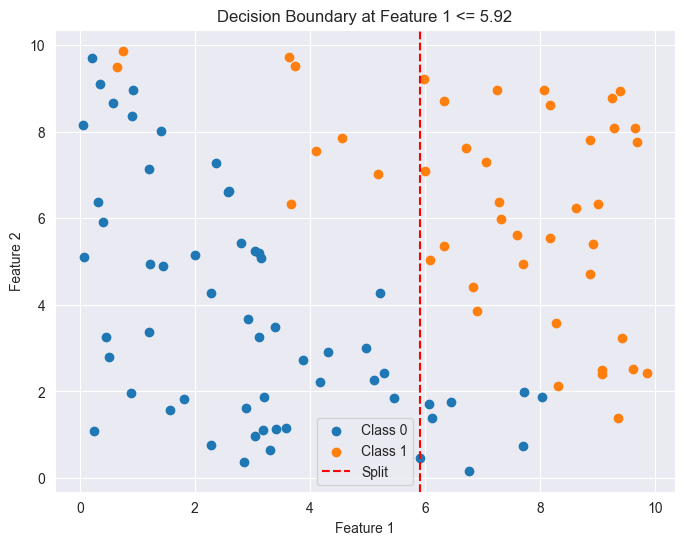

Predictions: [0 1 0 0 1 0 1 0 0 0]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchDecisionTreeClassifierDepth1:
    def __init__(self):
        self.best_feature = None
        self.best_threshold = None
        self.left_class = None
        self.right_class = None

    def gini_impurity(self, class_counts):
        total_samples = sum(class_counts)
        if total_samples == 0:
            return 0.0

        probabilities = [count / total_samples for count in class_counts]
        gini = 1 - sum(p ** 2 for p in probabilities)
        return gini

    def information_gain(self, parent_counts, left_counts, right_counts):
        total_samples = sum(parent_counts)
        left_samples = sum(left_counts)
        right_samples = sum(right_counts)

        if total_samples == 0:
            return 0.0

        parent_gini = self.gini_impurity(parent_counts)
        left_gini = self.gini_impurity(left_counts)
        right_gini = self.gini_impurity(right_counts)

        weighted_gini = (left_samples / total_samples) * left_gini + (right_samples / total_samples) * right_gini
        return parent_gini - weighted_gini

    def split_data(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def find_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_gain = -1

        parent_counts = [np.sum(y == c) for c in np.unique(y)]

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                _, y_left, _, y_right = self.split_data(X, y, feature_index, threshold)
                left_counts = [np.sum(y_left == c) for c in np.unique(y)]
                right_counts = [np.sum(y_right == c) for c in np.unique(y)]

                gain = self.information_gain(parent_counts, left_counts, right_counts)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def fit(self, X, y):
        self.best_feature, self.best_threshold, _ = self.find_best_split(X, y)

        X_left, y_left, X_right, y_right = self.split_data(X, y, self.best_feature, self.best_threshold)
        self.left_class = np.argmax(np.bincount(y_left)) if len(y_left) > 0 else None
        self.right_class = np.argmax(np.bincount(y_right)) if len(y_right) > 0 else None

    def predict(self, X):
        predictions = []
        for x in X:
            if x[self.best_feature] <= self.best_threshold:
                predictions.append(self.left_class)
            else:
                predictions.append(self.right_class)
        return np.array(predictions)

    def visualize_split(self, X, y):
        plt.figure(figsize=(8, 6))
        for class_value in np.unique(y):
            plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f"Class {class_value}")

        if self.best_feature == 0:
            plt.axvline(x=self.best_threshold, color="red", linestyle="--", label="Split")
        elif self.best_feature == 1:
            plt.axhline(y=self.best_threshold, color="red", linestyle="--", label="Split")

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title(f"Decision Boundary at Feature {self.best_feature + 1} <= {self.best_threshold:.2f}")
        plt.show()

# Example Usage
np.random.seed(42)
X_example = np.random.rand(100, 2) * 10
y_example = np.array([0 if x[0] + x[1] < 10 else 1 for x in X_example])

model = ScratchDecisionTreeClassifierDepth1()
model.fit(X_example, y_example)
print(f"Best Feature: {model.best_feature}, Best Threshold: {model.best_threshold:.2f}")

model.visualize_split(X_example, y_example)

predictions = model.predict(X_example)
print("Predictions:", predictions[:10])


Visualizing the results

Best Feature: 0, Best Threshold: 5.92


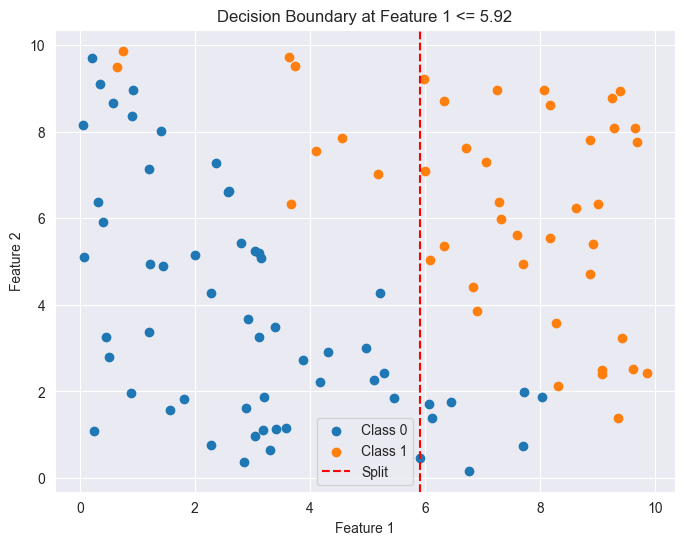

Predictions: [0 1 0 0 1 0 1 0 0 0]


In [12]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchDecisionTreeClassifierDepth1:
    def __init__(self):
        self.best_feature = None
        self.best_threshold = None
        self.left_class = None
        self.right_class = None

    def gini_impurity(self, class_counts):
        total_samples = sum(class_counts)
        if total_samples == 0:
            return 0.0

        probabilities = [count / total_samples for count in class_counts]
        gini = 1 - sum(p ** 2 for p in probabilities)
        return gini

    def information_gain(self, parent_counts, left_counts, right_counts):
        total_samples = sum(parent_counts)
        left_samples = sum(left_counts)
        right_samples = sum(right_counts)

        if total_samples == 0:
            return 0.0

        parent_gini = self.gini_impurity(parent_counts)
        left_gini = self.gini_impurity(left_counts)
        right_gini = self.gini_impurity(right_counts)

        weighted_gini = (left_samples / total_samples) * left_gini + (right_samples / total_samples) * right_gini
        return parent_gini - weighted_gini

    def split_data(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def find_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_gain = -1

        parent_counts = [np.sum(y == c) for c in np.unique(y)]

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                _, y_left, _, y_right = self.split_data(X, y, feature_index, threshold)
                left_counts = [np.sum(y_left == c) for c in np.unique(y)]
                right_counts = [np.sum(y_right == c) for c in np.unique(y)]

                gain = self.information_gain(parent_counts, left_counts, right_counts)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def fit(self, X, y):
        self.best_feature, self.best_threshold, _ = self.find_best_split(X, y)

        X_left, y_left, X_right, y_right = self.split_data(X, y, self.best_feature, self.best_threshold)
        self.left_class = np.argmax(np.bincount(y_left)) if len(y_left) > 0 else None
        self.right_class = np.argmax(np.bincount(y_right)) if len(y_right) > 0 else None

    def predict(self, X):
        predictions = []
        for x in X:
            if x[self.best_feature] <= self.best_threshold:
                predictions.append(self.left_class)
            else:
                predictions.append(self.right_class)
        return np.array(predictions)

    def visualize_split(self, X, y):
        plt.figure(figsize=(8, 6))
        for class_value in np.unique(y):
            plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f"Class {class_value}")

        if self.best_feature == 0:
            plt.axvline(x=self.best_threshold, color="red", linestyle="--", label="Split")
        elif self.best_feature == 1:
            plt.axhline(y=self.best_threshold, color="red", linestyle="--", label="Split")

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.title(f"Decision Boundary at Feature {self.best_feature + 1} <= {self.best_threshold:.2f}")
        plt.show()

# Example Usage
np.random.seed(42)
X_example = np.random.rand(100, 2) * 10
y_example = np.array([0 if x[0] + x[1] < 10 else 1 for x in X_example])

model = ScratchDecisionTreeClassifierDepth1()
model.fit(X_example, y_example)
print(f"Best Feature: {model.best_feature}, Best Threshold: {model.best_threshold:.2f}")

model.visualize_split(X_example, y_example)

predictions = model.predict(X_example)
print("Predictions:", predictions[:10])


(Advance assignment) Creation of a decision tree classifier class with a depth of 2

Predictions: [1 0 0 0 0 1 0 0 0 0]


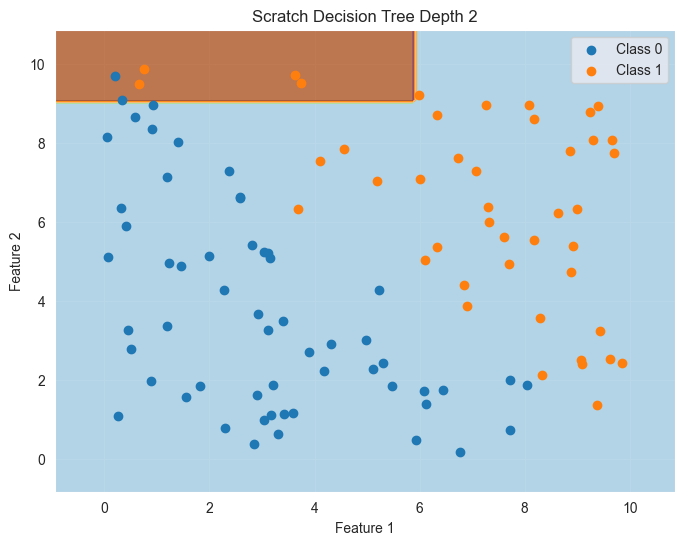

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.is_leaf = False
        self.predicted_class = None

class ScratchDecisionTreeClassifierDepth2:
    def __init__(self):
        self.root = Node()

    def gini_impurity(self, class_counts):
        total_samples = sum(class_counts)
        if total_samples == 0:
            return 0.0  # No impurity if the node is empty

        probabilities = [count / total_samples for count in class_counts]
        gini = 1 - sum(p ** 2 for p in probabilities)
        return gini

    def information_gain(self, parent_counts, left_counts, right_counts):
        total_samples = sum(parent_counts)
        left_samples = sum(left_counts)
        right_samples = sum(right_counts)

        if total_samples == 0:
            return 0.0  # No gain if parent is empty

        parent_gini = self.gini_impurity(parent_counts)
        left_gini = self.gini_impurity(left_counts)
        right_gini = self.gini_impurity(right_counts)

        weighted_gini = (left_samples / total_samples) * left_gini + (right_samples / total_samples) * right_gini
        return parent_gini - weighted_gini

    def split_data(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def find_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_gain = -1

        parent_counts = [np.sum(y == c) for c in np.unique(y)]

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                _, y_left, _, y_right = self.split_data(X, y, feature_index, threshold)
                left_counts = [np.sum(y_left == c) for c in np.unique(y)]
                right_counts = [np.sum(y_right == c) for c in np.unique(y)]

                gain = self.information_gain(parent_counts, left_counts, right_counts)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def build_tree(self, node, X, y, depth):
        if depth == 0 or len(np.unique(y)) == 1:
            node.is_leaf = True
            node.predicted_class = np.argmax([np.sum(y == c) for c in np.unique(y)])
            return

        best_feature, best_threshold, _ = self.find_best_split(X, y)

        if best_feature is None:
            node.is_leaf = True
            node.predicted_class = np.argmax([np.sum(y == c) for c in np.unique(y)])
            return

        node.feature_index = best_feature
        node.threshold = best_threshold

        X_left, y_left, X_right, y_right = self.split_data(X, y, best_feature, best_threshold)

        node.left = Node()
        node.right = Node()

        self.build_tree(node.left, X_left, y_left, depth - 1)
        self.build_tree(node.right, X_right, y_right, depth - 1)

    def fit(self, X, y):
        self.build_tree(self.root, X, y, depth=2)

    def predict_one(self, x, node):
        if node.is_leaf:
            return node.predicted_class

        if x[node.feature_index] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.root) for x in X])

# Example Usage
np.random.seed(42)
X_example = np.random.rand(100, 2) * 10
y_example = np.array([0 if x[0] + x[1] < 10 else 1 for x in X_example])

# Fit the model
scratch_model = ScratchDecisionTreeClassifierDepth2()
scratch_model.fit(X_example, y_example)

# Predict
predictions = scratch_model.predict(X_example)
print("Predictions:", predictions[:10])

# Visualize decision area
def plot_decision_area(model, X, y, title, resolution=100):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution),
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    for class_value in np.unique(y):
        plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f"Class {class_value}")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_area(scratch_model, X_example, y_example, "Scratch Decision Tree Depth 2")


(Advance assignment) Creation of decision tree classifier class with unlimited depth

Predictions: [0 0 0 0 0 0 0 0 0 0]


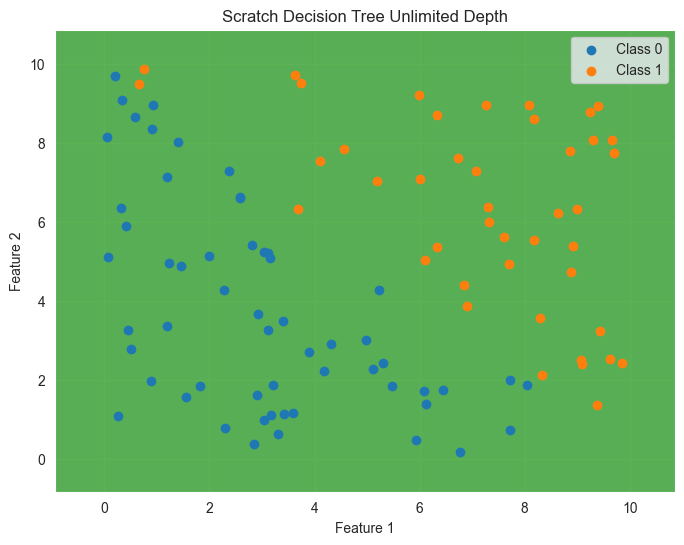

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.is_leaf = False
        self.predicted_class = None

class ScratchDecisionTreeClassifierDepthInf:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.root = Node()
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def gini_impurity(self, class_counts):
        total_samples = sum(class_counts)
        if total_samples == 0:
            return 0.0  # No impurity if the node is empty

        probabilities = [count / total_samples for count in class_counts]
        gini = 1 - sum(p ** 2 for p in probabilities)
        return gini

    def information_gain(self, parent_counts, left_counts, right_counts):
        total_samples = sum(parent_counts)
        left_samples = sum(left_counts)
        right_samples = sum(right_counts)

        if total_samples == 0:
            return 0.0  # No gain if parent is empty

        parent_gini = self.gini_impurity(parent_counts)
        left_gini = self.gini_impurity(left_counts)
        right_gini = self.gini_impurity(right_counts)

        weighted_gini = (left_samples / total_samples) * left_gini + (right_samples / total_samples) * right_gini
        return parent_gini - weighted_gini

    def split_data(self, X, y, feature_index, threshold):
        left_mask = X[:, feature_index] <= threshold
        right_mask = ~left_mask
        return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

    def find_best_split(self, X, y):
        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_gain = -1

        parent_counts = [np.sum(y == c) for c in np.unique(y)]

        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])

            for threshold in thresholds:
                _, y_left, _, y_right = self.split_data(X, y, feature_index, threshold)
                left_counts = [np.sum(y_left == c) for c in np.unique(y)]
                right_counts = [np.sum(y_right == c) for c in np.unique(y)]

                gain = self.information_gain(parent_counts, left_counts, right_counts)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def build_tree(self, node, X, y, depth):
        if (self.max_depth is not None and depth == self.max_depth) or len(np.unique(y)) == 1 or len(y) < self.min_samples_split:
            node.is_leaf = True
            node.predicted_class = np.argmax([np.sum(y == c) for c in np.unique(y)])
            return

        best_feature, best_threshold, _ = self.find_best_split(X, y)

        if best_feature is None:
            node.is_leaf = True
            node.predicted_class = np.argmax([np.sum(y == c) for c in np.unique(y)])
            return

        node.feature_index = best_feature
        node.threshold = best_threshold

        X_left, y_left, X_right, y_right = self.split_data(X, y, best_feature, best_threshold)

        node.left = Node()
        node.right = Node()

        self.build_tree(node.left, X_left, y_left, depth + 1)
        self.build_tree(node.right, X_right, y_right, depth + 1)

    def fit(self, X, y):
        self.build_tree(self.root, X, y, depth=0)

    def predict_one(self, x, node):
        if node.is_leaf:
            return node.predicted_class

        if x[node.feature_index] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return np.array([self.predict_one(x, self.root) for x in X])

# Example Usage
np.random.seed(42)
X_example = np.random.rand(100, 2) * 10
y_example = np.array([0 if x[0] + x[1] < 10 else 1 for x in X_example])

# Fit the model
scratch_model_inf = ScratchDecisionTreeClassifierDepthInf(max_depth=None, min_samples_split=2)
scratch_model_inf.fit(X_example, y_example)

# Predict
predictions_inf = scratch_model_inf.predict(X_example)
print("Predictions:", predictions_inf[:10])

# Visualize decision area
def plot_decision_area(model, X, y, title, resolution=100):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution),
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    for class_value in np.unique(y):
        plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f"Class {class_value}")

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_area(scratch_model_inf, X_example, y_example, "Scratch Decision Tree Unlimited Depth")